# CARGA DE LIBRERIAS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

import torch
from torch import nn  # Modelos neuronales y funciones de Loss

from torch import optim # (3er paso BACKPROPAGATION) Optimizadores ---> Gradiente descendiente, Adam, AdaDelta, etc
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Elige el dispositivo. Utilizará GPU si está disponible

# VISAULIZACION DE LOS DATOS

In [2]:
data = pd.read_csv('irisbin.csv', header=None).to_numpy()

In [3]:
data  # La clase está repartida en 3 columnas (codificación one-hot)

array([[ 4.5,  2.3,  1.3, ..., -1. , -1. ,  1. ],
       [ 5.1,  3.3,  1.7, ..., -1. , -1. ,  1. ],
       [ 7.2,  3. ,  5.8, ...,  1. , -1. , -1. ],
       ...,
       [ 5.5,  2.3,  4. , ..., -1. ,  1. , -1. ],
       [ 5.6,  2.8,  4.9, ...,  1. , -1. , -1. ],
       [ 6.1,  2.6,  5.6, ...,  1. , -1. , -1. ]])

In [4]:
data[:,-3:].argmax(axis=1)  # Extraigo la posición del "1" para cada patrón ---> Clase

array([2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1,
       2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0])

In [5]:
new_data = data[:,:-2]
new_data[:,-1] = data[:,-3:].argmax(axis=1)

In [6]:
new_data  # Genero el nuevo dataset

array([[4.5, 2.3, 1.3, 0.3, 2. ],
       [5.1, 3.3, 1.7, 0.5, 2. ],
       [7.2, 3. , 5.8, 1.6, 0. ],
       [5.5, 4.2, 1.4, 0.2, 2. ],
       [6.7, 3.1, 4.7, 1.5, 1. ],
       [6.4, 3.1, 5.5, 1.8, 0. ],
       [6.1, 3. , 4.9, 1.8, 0. ],
       [5.2, 3.4, 1.4, 0.2, 2. ],
       [5. , 3.3, 1.4, 0.2, 2. ],
       [6.7, 3.3, 5.7, 2.1, 0. ],
       [7.7, 2.6, 6.9, 2.3, 0. ],
       [5.6, 3. , 4.5, 1.5, 1. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [6.7, 3.3, 5.7, 2.1, 0. ],
       [5.5, 4.2, 1.4, 0.2, 2. ],
       [5.2, 3.4, 1.4, 0.2, 2. ],
       [5.4, 3.9, 1.7, 0.4, 2. ],
       [5. , 3.3, 1.4, 0.2, 2. ],
       [4.3, 3. , 1.1, 0.1, 2. ],
       [5.9, 3. , 5.1, 1.8, 0. ],
       [5.2, 3.4, 1.4, 0.2, 2. ],
       [4.6, 3.1, 1.5, 0.2, 2. ],
       [6.3, 2.5, 5. , 1.9, 0. ],
       [5.1, 3.3, 1.7, 0.5, 2. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [6.7, 3.1, 4.7, 1.5, 1. ],
       [6.1, 3. , 4.6, 1.4, 1. ],
       [6.7, 3.3, 5.7, 2.1, 0. ],
       [6.7, 3.1, 4.4, 1.4, 1. ],
       [7.1, 3

### GENERO UNA PROYECCION POR PCA PARA VISUALIZAR LOS DATOS EN 2D

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit(new_data[:,:-1],new_data[:,-1]).transform(new_data[:,:-1])

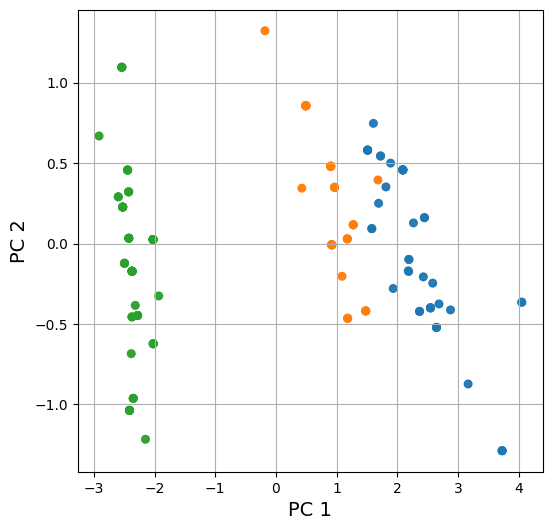

In [8]:
fig,ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X_pca[:, 0],
           X_pca[:, 1],
           s=30,
           c=[f'C{int(i)}' for i in new_data[:,-1]],
           alpha=0.96,
           lw=1)
plt.grid(True)
plt.xlabel('PC 1', fontsize=14)
plt.ylabel('PC 2', fontsize=14)
plt.grid(True);

# PARTICIONO LOS DATOS

In [9]:
from sklearn.model_selection import train_test_split

X, X_tst = train_test_split(new_data, test_size=0.2, random_state=42, shuffle=True)
X_trn, X_val = train_test_split(X, test_size=0.3, random_state=42, shuffle=True)

np.savetxt('data_trn.csv', X_trn, fmt='%1.4f,%1.4f,%1.4f,%1.4f,%i', delimiter=',')
np.savetxt('data_val.csv', X_val, fmt='%1.4f,%1.4f,%1.4f,%1.4f,%i', delimiter=',')
np.savetxt('data_tst.csv', X_tst, fmt='%1.4f,%1.4f,%1.4f,%1.4f,%i', delimiter=',')

# CONSTRUCCION DEL DATASET

In [10]:
class DATASET(Dataset):  # <----------------
    '''
    Esta clase maneja la lectura de los datos y provee un mecanismo
    para alimentar los modelos con los patrones.
    '''
    
    #===================================================
    def __init__(self, filename):
        
        #------------------------------------
        # LECTURA DE LOS DATOS
        data = pd.read_csv(filename, header=0) # Levanta los datos en formato numpy
        
        #------------------------------------
        # TRANSFORMO A DATOS DE NUMPY
        data = data.to_numpy()
        
        #------------------------------------
        # ALEATORIZO LOS PATRONES (filas)
        idxs = np.arange(len(data))  # Genero un vector de índices
        np.random.shuffle(idxs)
        data = data[idxs,:]
        
        #------------------------------------
        # SEPARO LOS DATOS
        self.x = data[:,:-1].astype(np.float32)
        self.y = data[:,-1].astype(np.longlong)  # La clase está en la última columna
        
    
    #===================================================
    def __len__(self):
        '''
        Devuelve el número de patrones en el dataset.
        '''
        return len(self.x)
    
    
    #===================================================
    def __getitem__(self, idx):
        '''
        Devuelve el/los patrones indicados.
        '''
        return self.x[idx,:], self.y[idx]

# CONSTRUCCION DEL MODELO

## PERCEPTRON SIMPLE

In [11]:
class MODELO(nn.Module):  # <----------------------------

    #====================================
    def __init__(self, n_features, n_inputs, n_hiddens, n_outputs):
        '''
        Esta función inicializa/construye el perceptrón.
        n_features: features de cada patrón (2 para OR y XOR)
        n_inputs: cantidad de neuronas en la capa de entrada
        n_hiddens: cantidad de neuronas en la capa oculta
        n_outputs: cantidad de salidas esperadas.
        '''
        
        super().__init__()
        
        self.n_features = n_features
        self.n_inputs = n_inputs
        self.n_hiddens = n_hiddens
        self.n_outputs = n_outputs
        
        self.layer1 = nn.Linear(self.n_features, self.n_inputs, bias=True)
        self.layer2 = nn.Linear(self.n_inputs, self.n_hiddens, bias=True)
        self.layer3 = nn.Linear(self.n_hiddens, self.n_outputs, bias=True)
        
        self.tanh = nn.Tanh()
        
    #====================================
    def forward(self, x):
        '''
        Esta función realiza la pasada hacia adelante.
        '''
        
        # Calculo salida lineal de la capa 1
        y = self.layer1(x)  # self.n_features --> self.n_inputs
        
        # Aplico función no lineal
        y = self.tanh(y)
        
        # Calculo salida lineal de la capa 2
        y = self.layer2(y)  # self.n_inputs --> self.n_hiddens
        
        # Aplico función no lineal
        y = self.tanh(y)
        
        # Calculo salida lineal de la capa 3
        y = self.layer3(y)  # self.n_hiddens --> self.n_outputs

        return y

In [12]:
class MODELO2(nn.Module):  # <----------------------------

    #====================================
    def __init__(self, n_features, n_inputs, n_outputs):
        '''
        Esta función inicializa/construye el perceptrón.
        n_features: features de cada patrón (2 para OR y XOR)
        n_inputs: cantidad de neuronas en la capa de entrada
        n_hiddens: cantidad de neuronas en la capa oculta
        n_outputs: cantidad de salidas esperadas.
        '''
        
        super().__init__()
        
        self.n_features = n_features
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.layer1 = nn.Linear(self.n_features, self.n_inputs, bias=True)
        self.layer2 = nn.Linear(self.n_inputs, self.n_outputs, bias=True)
        
        self.tanh = nn.Tanh()
        #self.sigmoid = nn.Sigmoid()
        #self.relu = nn.ReLU()

    #====================================
    def forward(self, x):
        '''
        Esta función realiza la pasada hacia adelante.
        '''
        
        # Calculo salida lineal de la capa 1
        y = self.layer1(x)  # self.n_features --> self.n_inputs
        
        # Aplico función no lineal
        y = self.tanh(y)
        
        # Calculo salida lineal de la capa 2
        y = self.layer2(y)  # self.n_inputs --> self.n_hiddens
        
        return y

# LOOPS

## ENTRENAMIENTO

In [13]:
def train_step(model, data, loss_function, optimizer, device):
    
    model.train()  # Calcula gradientes
    
    N_batches = len(data)  # Número de batches = N_patrones/N_patrones_x_batch
    
    error = 0
    
    #==============================================================
    for idx,(X,y) in enumerate(data):

        #-----------------------------------------------------
        # Convierto los datos en tensores diferenciables
        #-----------------------------------------------------
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()  # Se limpia el caché del optimizador
        
        #----------------
        # Forward pass
        #----------------
        y_pred = model(X)
        
        #----------------
        # Compute Loss
        #----------------
        if (data.batch_size == 1):
            loss = loss_function(y_pred.squeeze(), y.squeeze())
        else:
            loss = loss_function(y_pred.squeeze(), y)
        
        error += loss.item()
        
        #----------------
        # Backward pass
        #----------------
        loss.backward()  # Calcula los gradientes en cada capa
        optimizer.step()  # Corrige los pesos
    #==============================================================
    
    error /= N_batches
    
    return error, model

## VALIDACION / TEST

In [14]:
def predict_step(model, data, loss_function, device):
    
    model.eval()  # Turn off Dropouts Layers, BatchNorm Layers etc
    
    N_batches = len(data)  # Número de batches = N_patrones/N_patrones_x_batch
    
    error = 0
    
    Y = torch.tensor([])
    Yp = torch.tensor([])
    
    #==============================================================
    with torch.no_grad():  # Turn off gradients computation
        
        for idx,(X,y) in enumerate(data):

            Y = torch.hstack( (Y, y.flatten()) )

            #-----------------------------------------------------
            # Convierto los datos en tensores diferenciables
            #-----------------------------------------------------
            X = X.to(device)
            y = y.to(device)

            #----------------
            # Forward pass
            #----------------
            y_pred = model(X)
            
            Yp = torch.hstack( (Yp, y_pred.cpu().argmax(dim=1)) )

            #----------------
            # Compute Loss
            #----------------
            if (data.batch_size == 1):
                loss = loss_function(y_pred.squeeze(), y.squeeze())
            else:
                loss = loss_function(y_pred.squeeze(), y)

            error += loss.item()
    #==============================================================
    
    error /= N_batches
    
    #------------------
    
    return error, Y, Yp

# EXPERIMENTO

In [15]:
#==========================================
# Inicializamos parámetros del experimento
#==========================================
learning_rate = 1E-3


acc = 0.  # Inicializo el accuracy inicial
epoca = 0  # Inicializo contador de épocas

MIN_ACC = 1.0  # Defino mínimo accuracy deseado

MIN_ERROR = 1E6   # Inicializo la variable para
                  # registrar el mínimo error cometido.
    
MAX_EPOCAS = 1000  # Defino el número máximo de épocas
                  # de entrenamiento.

MAX_COUNTER = 100  # Defino el máximo número de épocas
                  # sin mejorar el error de validación
                  # para detener el entrenamiento.

BATCH_SIZE = 8  # Número de patrones en cada batch


#===========================================================
# Construimos los datasets para entrenamiento y validación
#===========================================================
filename_train = 'data_trn.csv'
filename_validation = 'data_val.csv'
filename_test = 'data_tst.csv'

trn = DATASET(filename_train)
val = DATASET(filename_validation)
tst = DATASET(filename_test)


#=============================================================
# Construimos los dataloaders para entrenamiento y validación
#=============================================================
train_data = DataLoader(trn, batch_size=BATCH_SIZE, shuffle=True)
validation_data = DataLoader(val, batch_size=BATCH_SIZE, shuffle=False)


#=============================================
# Inicializamos el modelo
#=============================================
modelo = MODELO2(n_features=4, n_inputs=1, n_outputs=3)  # --------------> SIN CAPA OCULTA
#modelo = MODELO(n_features=4, n_inputs=2, n_hiddens=3, n_outputs=3)  # ---> CON CAPA OCULTA
modelo.to(device)

#=============================================
# Definimos la función de LOSS a utilizar
#=============================================
loss_function = nn.CrossEntropyLoss(reduction='mean').to(device)

#=============================================
# Definimos el optimizador a utilizar
# >>> 3er paso del backpropagation
#=============================================
optimizer = optim.SGD(modelo.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = optim.Adam(modelo.parameters(), lr=learning_rate)

## ENTRENAMIENTO DEL MODELO

In [16]:
TRN_error = []  # Inicializo estructura para almacenar
                # los errores en el tiempo
VAL_error = []  # Inicializo estructura para almacenar
                # los errores en el tiempo
accuracy = []  # Inicializo estructura para almacenar
               # el accuracy en el tiempo

STOP = False
counter = 0

best_model = None
best_model_weights = None
best_epoca = 0
best_acc = 0


#===============================================================
while (epoca < MAX_EPOCAS) and (not STOP):

    epoca += 1
    
    #----------------------
    # ENTRENAMIENTO
    #----------------------
    trn_error,modelo = train_step(modelo, train_data, loss_function, optimizer, device)
    
    #----------------------
    # VALIDACION
    #----------------------
    val_error,Y,Yp = predict_step(modelo, validation_data, loss_function, device)
    
    acc = torch.sum(Yp == Y)/ len(Y)
    
    #----------------------
    # ALMACENO MEDIDAS
    #----------------------
    TRN_error.append(trn_error)
    VAL_error.append(val_error)
    accuracy.append(acc)
    
    #-----------------------------------------------
    # CRITERIO DE CORTE Y ALMACENAMIENTO DEL MODELO
    #-----------------------------------------------
    if (val_error < MIN_ERROR):
        best_epoca = epoca
        MIN_ERROR = val_error
        best_acc = acc
        counter = 0
        
        #·······················
        # Almaceno el modelo
        #·······················
        best_model = deepcopy(modelo)  # Genero una copia independiente
        best_model_weights = best_model.state_dict()
        
    else:
        counter += 1
        if counter > MAX_COUNTER:
            STOP = True
    
    #--------------------------------------------
    # MUESTRO REPORTE POR PANTALLA (POR EPOCA)
    #--------------------------------------------
    if (epoca % 50) == 0:
        print(f'Epoca: {epoca} -- Error: {val_error:.4}\t--\tTasa acierto [train]: {acc:.4}\n')
#===============================================================

#--------------------------------------------
# MUESTRO REPORTE POR PANTALLA (FINAL)
#--------------------------------------------
print('='*79)
print(f'FINAL -- Epoca: {best_epoca} -- Error: {MIN_ERROR:.4}\t--\tTasa acierto [train]: {best_acc:.4}')
print('='*79)

#-----------------------------
# GUARDO MEJOR MODELO A DISCO
#-----------------------------
torch.save(best_model,
           'best_model.pt',
           _use_new_zipfile_serialization=True)
        
#----------------------------------------------
# GUARDAMOS LOS PESOS DEL MEJOR MODELO A DISCO
#----------------------------------------------
torch.save(best_model.state_dict(),
           'best_model_state_dict.pt',
           _use_new_zipfile_serialization=True)

Epoca: 50 -- Error: 1.094	--	Tasa acierto [train]: 0.5143

Epoca: 100 -- Error: 1.09	--	Tasa acierto [train]: 0.5143

Epoca: 150 -- Error: 1.088	--	Tasa acierto [train]: 0.5143

Epoca: 200 -- Error: 1.09	--	Tasa acierto [train]: 0.5143

FINAL -- Epoca: 105 -- Error: 1.086	--	Tasa acierto [train]: 0.5143


## GRAFICAMOS LAS SALIDAS

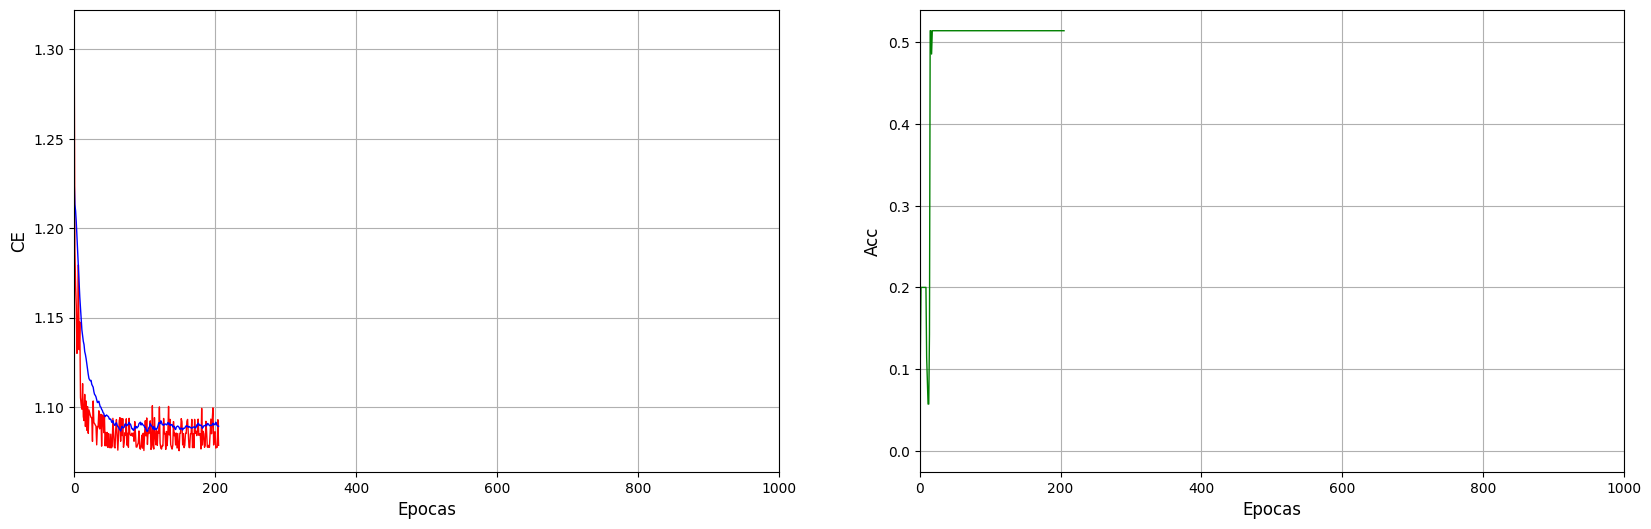

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

epocas = np.arange(epoca)

# ERROR
ax[0].plot(epocas, TRN_error, '-r', lw=1, label='Train')
ax[0].plot(epocas, VAL_error, '-b', lw=1, label='Validation')
ax[0].grid(True)
ax[0].set_xlim(0,MAX_EPOCAS)
ax[0].set_xlabel('Epocas', fontsize=12)
ax[0].set_ylabel('CE', fontsize=12)

# ACC
ax[1].plot(epocas, accuracy, '-g', lw=1)
ax[1].grid(True)
ax[1].set_xlim(0,MAX_EPOCAS)
ax[1].set_xlabel('Epocas', fontsize=12)
ax[1].set_ylabel('Acc', fontsize=12);

---

## LECTURA DE DATOS DE EVALUACION

In [ ]:
#=====================================
# LEVANTAMOS DE DISCO EL MEJOR MODELO
#=====================================

del modelo  # Eliminamos de memoria
            # para asegurarnos de usar
            # el modelo guardado en disco

#--------------------------------------
# Modelo completo (archivo binario)
#--------------------------------------
modelo = torch.load('best_model.pt')
modelo.to(device)

#-----------------------
# A partir de los pesos
#-----------------------
#best_model = torch.load('best_model_state_dict.pt')
#modelo = PERCEPTRON(n_features=2, lr=learning_rate)
#modelo.load_state_dict(best_model)
#modelo.to(device)

In [ ]:
#=====================================
# CONSTRUIMOS EL DATASET PARA TEST
#=====================================
test_data = DataLoader(tst, batch_size=BATCH_SIZE, shuffle=False)

#=====================================
# EVALUAMOS EL MODELO ENTRENADO
#=====================================
tst_error,Y,Yp = predict_step(modelo, test_data, loss_function, device)

acc = torch.sum(Yp == Y)/ len(Y)

print(f'\nTasa acierto [test]: {acc:.4}\n')